#### IMPORTS

In [2]:
import autopep8
import pandas as pd
import seaborn as sns
import numpy as np
import time
import pickle
import joblib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import array as ar
from tqdm import tqdm
import sklearn
print("Scikit-Learn version : {}".format(sklearn.__version__))

Scikit-Learn version : 1.2.2


In [3]:
# Preprocessing, Imputing, Upsampling, Model Selection, Model Evaluation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from collections import Counter

from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbpipeline

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import fbeta_score, make_scorer, auc
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import get_scorer_names

In [4]:
#Predictive Models

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression


# print("lightgbm version : {}".format(lightgbm.__version__))
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Interpreting Predictions


import shap
print("SHAP version : {}".format(shap.__version__))

# app building
import streamlit as st
# print("streamlit version : {}".format(streamlit.__version__))

SHAP version : 0.42.0


##### Parameters 

In [5]:
plt.style.use('fivethirtyeight')
plt.rcParams.update(
    {
     'xtick.labelsize':15,
     'ytick.labelsize':15,
     'axes.labelsize': 15,
     'legend.fontsize': 15,
     'axes.titlesize':15,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

In [6]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour bien visualiser les colonnes
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

# Format des graphiques seaborn
sns.set_theme(style="whitegrid")

#### Restauration des données de test pour l'interprétation du modèle

In [7]:
# on recharge les données de test
X_test = joblib.load('Models/X_test.pkl')
X_test

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,...,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,

Suppression le caractère '/'

In [8]:
dash_cols = [col for col in X_test.columns if '/' in col]
X_test[dash_cols]

,NAME_FAMILY_STATUS_Single / not married,NAME_HOUSING_TYPE_House / apartment,OCCUPATION_TYPE_Waiters/barmen staff
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,1.0,0.0
9996,0.0,1.0,0.0
9997,1.0,1.0,0.0
9998,0.0,1.0,0.0


In [9]:
# Supprimer le caractère '/' des noms de colonnes dans la liste dash_cols
dash_cols_updated = [col.replace('/', '_') for col in dash_cols]

# Sélectionner uniquement les colonnes correspondantes présentes dans X_test
valid_cols = set(dash_cols_updated).intersection(X_test.columns)
X_test_updated = X_test[valid_cols]

In [10]:
# on recharge les données de test
y_test = joblib.load('Models/y_test.pkl')
y_test

256571    0
191493    0
103497    0
130646    0
211898    0
         ..
122779    0
35741     0
130084    0
25115     0
248374    0
Name: TARGET, Length: 10000, dtype: int64

##### Interpréter les prédictions avec SHAP | TreeExplainer
##### Restauration du modèle / prétraitement des données / y_pred avec seuil / init JS

In [11]:
#model = joblib.load('Models/best_model_RandFor.joblib') 
model = joblib.load('Models/best_model_XGBC.joblib')
model

Pipeline(steps=[('impute', SimpleImputer()), ('smote', SMOTE(random_state=42)),
                ('scaler', StandardScaler()),
                ['classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=N...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_features='sqrt',
                               max_leaves=None, min_child_weight=None,
                               min_samples_leaf=45, missing=nan,
                               monotone_constraints=None, n_estimators=3,
                               n_jobs=None, num_parallel_tree=None, ...)]])

In [12]:
# Je retire l'étape du SMOTE car on ne SMOTE pas les données test
model.steps.pop(1)

('smote', SMOTE(random_state=42))

In [13]:
model

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler()),
                ['classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_features='sqrt',
                               max_leaves=None, min_child_weight=None,
                               min_samples_leaf=45, missing=nan,
                               monotone_constraints=None, n_estimators=3,
                               n_jobs=None, num_parallel_tree=None, ...)]])

In [14]:
# on recharge le best_threshold pour le modèle retenu
best_thresh = joblib.load('Models/best_thresh_XGBC.joblib')
best_thresh

0.13131313131313133

In [15]:
# save X_columns to be able to name array columns afterwards
X_columns = X_test.columns

# X_test as a dataframe (only imputer)
X_test = pd.DataFrame(model['impute'].transform(X_test), columns=X_columns)

# predictions from X_test using best threshold
y_pred = (model.predict_proba(X_test)[:, 1]>best_thresh)*1

In [16]:
print('y_pred contient',y_pred.shape[0],'observations, dont',sum(y_pred),'prévisions de défaut')

y_pred contient 10000 observations, dont 10000 prévisions de défaut


In [17]:
#load JS vis in the notebook
shap.initjs()

##### Interpréter le modèle avec SHAP
- Création de valeurs explicatives et SHAP

In [18]:
model.classes_

array([0, 1])

In [19]:
model

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler()),
                ['classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_features='sqrt',
                               max_leaves=None, min_child_weight=None,
                               min_samples_leaf=45, missing=nan,
                               monotone_constraints=None, n_estimators=3,
                               n_jobs=None, num_parallel_tree=None, ...)]])

In [20]:
explainer = shap.TreeExplainer(model['classifier'], X_test)
shap_values = explainer(X_test, check_additivity=False)
shap_values1 = explainer.shap_values(X_test, check_additivity=False)

In [21]:
shap_values

.values =
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

.base_values =
array([1.5144983, 1.5144983, 1.5144983, ..., 1.5144983, 1.5144983,
       1.5144983])

.data =
array([[5.26315789e-02, 1.12717019e-03, 1.81096629e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.96899000e+05],
       [0.00000000e+00, 5.50120603e-04, 7.98741573e-02, ...,
        0.00000000e+00, 0.00000000e+00, 3.22041000e+05],
       [0.00000000e+00, 1.05023024e-03, 5.97752809e-02, ...,
        1.00000000e+00, 0.00000000e+00, 2.20127000e+05],
       ...,
       [0.00000000e+00, 1.05023024e-03, 1.04168539e-01, ...,
        1.00000000e+00, 0.00000000e+00, 2.50873000e+05],
       [0.00000000e+00, 1.51186991e-03, 1.02247191e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.29213000e+05],
       [0.00000000e+00, 2.47361922e-

In [22]:
shap_values.feature_names

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXP

In [23]:
shap_values.shape

(10000, 247)

In [24]:
shap_values1.shape

(10000, 247)

In [25]:
shap.force_plot(shap_values.base_values[1], shap_values.values[0],\
                feature_names=shap_values.feature_names)

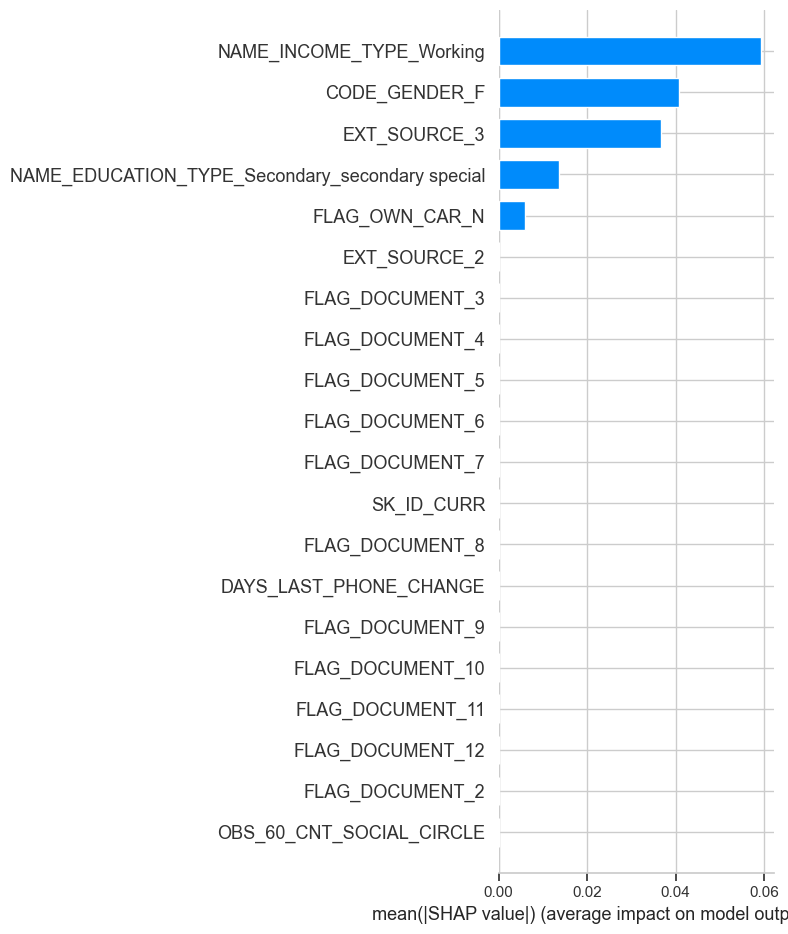

In [26]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

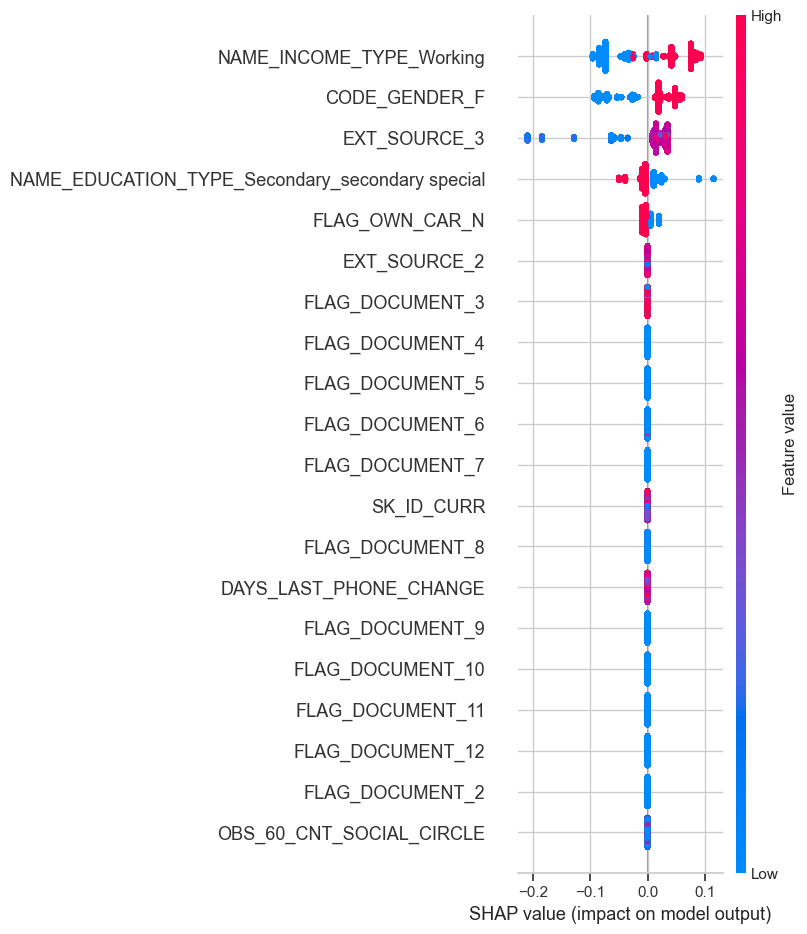

In [27]:
shap.summary_plot(shap_values, X_test)

##### interprétation analytique globale des caractéristiques les plus importantes

In [28]:
# compute mean of absolute values for shap values
vals = np.abs(shap_values1).mean(0)
# compute feature importance as a dataframe containing vals
feature_importance = pd.DataFrame(list(zip(X_columns, vals)),\
                                  columns=['col_name','feature_importance_vals'])
# display top 10 feature importance sorted
pd.set_option('display.max_rows', 150)
feature_importance.sort_values(by='feature_importance_vals', ascending=False)[0:10]

,col_name,feature_importance_vals
130,NAME_INCOME_TYPE_Working,0.059299
111,CODE_GENDER_F,0.040833
29,EXT_SOURCE_3,0.036669
135,NAME_EDUCATION_TYPE_Secondary_secondary special,0.013648
113,FLAG_OWN_CAR_N,0.005875
28,EXT_SOURCE_2,0.000021
164,OCCUPATION_TYPE_Waiters/barmen staff,0.000000
168,WEEKDAY_APPR_PROCESS_START_SUNDAY,0.000000
167,WEEKDAY_APPR_PROCESS_START_SATURDAY,0.000000
166,WEEKDAY_APPR_PROCESS_START_MONDAY,0.000000


In [29]:
pd.set_option('display.max_rows', 40)

In [30]:
# correspondance with the array format (hence the reset index for data)
data = pd.DataFrame(y_test, index=y_test.index).reset_index()

In [31]:
data["PRED"] = y_pred

In [32]:
data.loc[data["TARGET"]==0,:]

,index,TARGET,PRED
0,256571,0,1
1,191493,0,1
2,103497,0,1
3,130646,0,1
4,211898,0,1
...,...,...,...
9995,122779,0,1
9996,35741,0,1
9997,130084,0,1
9998,25115,0,1


In [33]:
data.loc[data["TARGET"]==1,:]

,index,TARGET,PRED
9,254495,1,1
63,156963,1,1
65,271248,1,1
70,299636,1,1
99,206875,1,1
...,...,...,...
9954,193932,1,1
9963,149129,1,1
9966,22819,1,1
9977,196930,1,1


In [34]:
# client number in the original X_test file
# ex granted : 316121
# ex not granted : 254495
idx = 254495
# client number in the corresponding array
data_idx = data.loc[data["index"]==idx].index[0]
print('original client number:', idx, '\ncorresponding array number :', data_idx)

original client number: 254495 
corresponding array number : 9


In [35]:
data.iloc[data_idx]

index     254495
TARGET         1
PRED           1
Name: 9, dtype: int64

In [36]:
data.iloc[data_idx]["index"] == idx

True

#### Lorsque nous utilisons l'index `data_idx` que nous avons obtenu, nous retrouvons effectivement la valeur de l'index d'origine `idx` que nous avons sélectionnée au départ. Ainsi, il y a une correspondance exacte entre les deux indices.

### Utilisez le numéro de client pour obtenir les valeurs SHAP correspondantes

In [37]:
# on utilise data_idx comme index et on récupère les données de X_test
# correspondantes à cet index dans la variable ID_to_predict
ID_to_predict = pd.DataFrame(X_test.iloc[data_idx,:]).T
ID_to_predict

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,...,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,

In [38]:
data.iloc[data_idx]

index     254495
TARGET         1
PRED           1
Name: 9, dtype: int64

#### Vérification de la prédiction vs TARGET y_test:

In [39]:
# on réalise la prédiction de ID_to_predict avec le modèle 
prediction = sum((model.predict_proba(ID_to_predict)[:, 1]>best_thresh)*1)
# (model.predict_proba(X_test)[:, 1]>best_thresh)*1
print('prediction:', prediction)
# on récupère la véritable classe y pour cet index
truth = y_test[idx]
print('truth:', truth)

prediction: 1
truth: 1


In [40]:
exp_val_log = explainer.expected_value

In [41]:
log_odds = round(explainer.model.predict(X_test.iloc[data_idx, :]),4)

In [42]:
exp_predict = round(np.exp(exp_val_log)/(1+np.exp(exp_val_log)),4)

In [43]:
prob_predict = round(np.exp(log_odds)/(1+np.exp(log_odds)),4)

In [44]:
prob_predict

0.8127

In [45]:
float(model.predict_proba(ID_to_predict)[:, 1])

0.2586195170879364

In [46]:
print('model reverts a log_odds of:', log_odds,'\nwhich corresponds to a probability of the 1 class of:', prob_predict)

model reverts a log_odds of: 1.4679 
which corresponds to a probability of the 1 class of: 0.8127


In [47]:
print('base values log_odds are:', exp_val_log,'\nwhich corresponds to a probability of the 1 class of:', exp_predict)

base values log_odds are: 1.5144982996582985 
which corresponds to a probability of the 1 class of: 0.8197


In [48]:
print('This probability of default is ',\
      (prob_predict > best_thresh)*'>',(prob_predict < best_thresh)*'<','class 1 threshold in the model.')
print('Hence the prediction is:', prediction)

This probability of default is  >  class 1 threshold in the model.
Hence the prediction is: 1


In [49]:
shap.force_plot(shap_values.base_values[1], shap_values.values[data_idx],\
                feature_names=shap_values.feature_names)

In [50]:
ID_to_predict

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,...,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,

In [51]:
top_10 = feature_importance.sort_values(by='feature_importance_vals', ascending=False)[0:10].col_name.tolist()

In [52]:
top_10

['NAME_INCOME_TYPE_Working',
 'CODE_GENDER_F',
 'EXT_SOURCE_3',
 'NAME_EDUCATION_TYPE_Secondary_secondary special',
 'FLAG_OWN_CAR_N',
 'EXT_SOURCE_2',
 'OCCUPATION_TYPE_Waiters/barmen staff',
 'WEEKDAY_APPR_PROCESS_START_SUNDAY',
 'WEEKDAY_APPR_PROCESS_START_SATURDAY',
 'WEEKDAY_APPR_PROCESS_START_MONDAY']

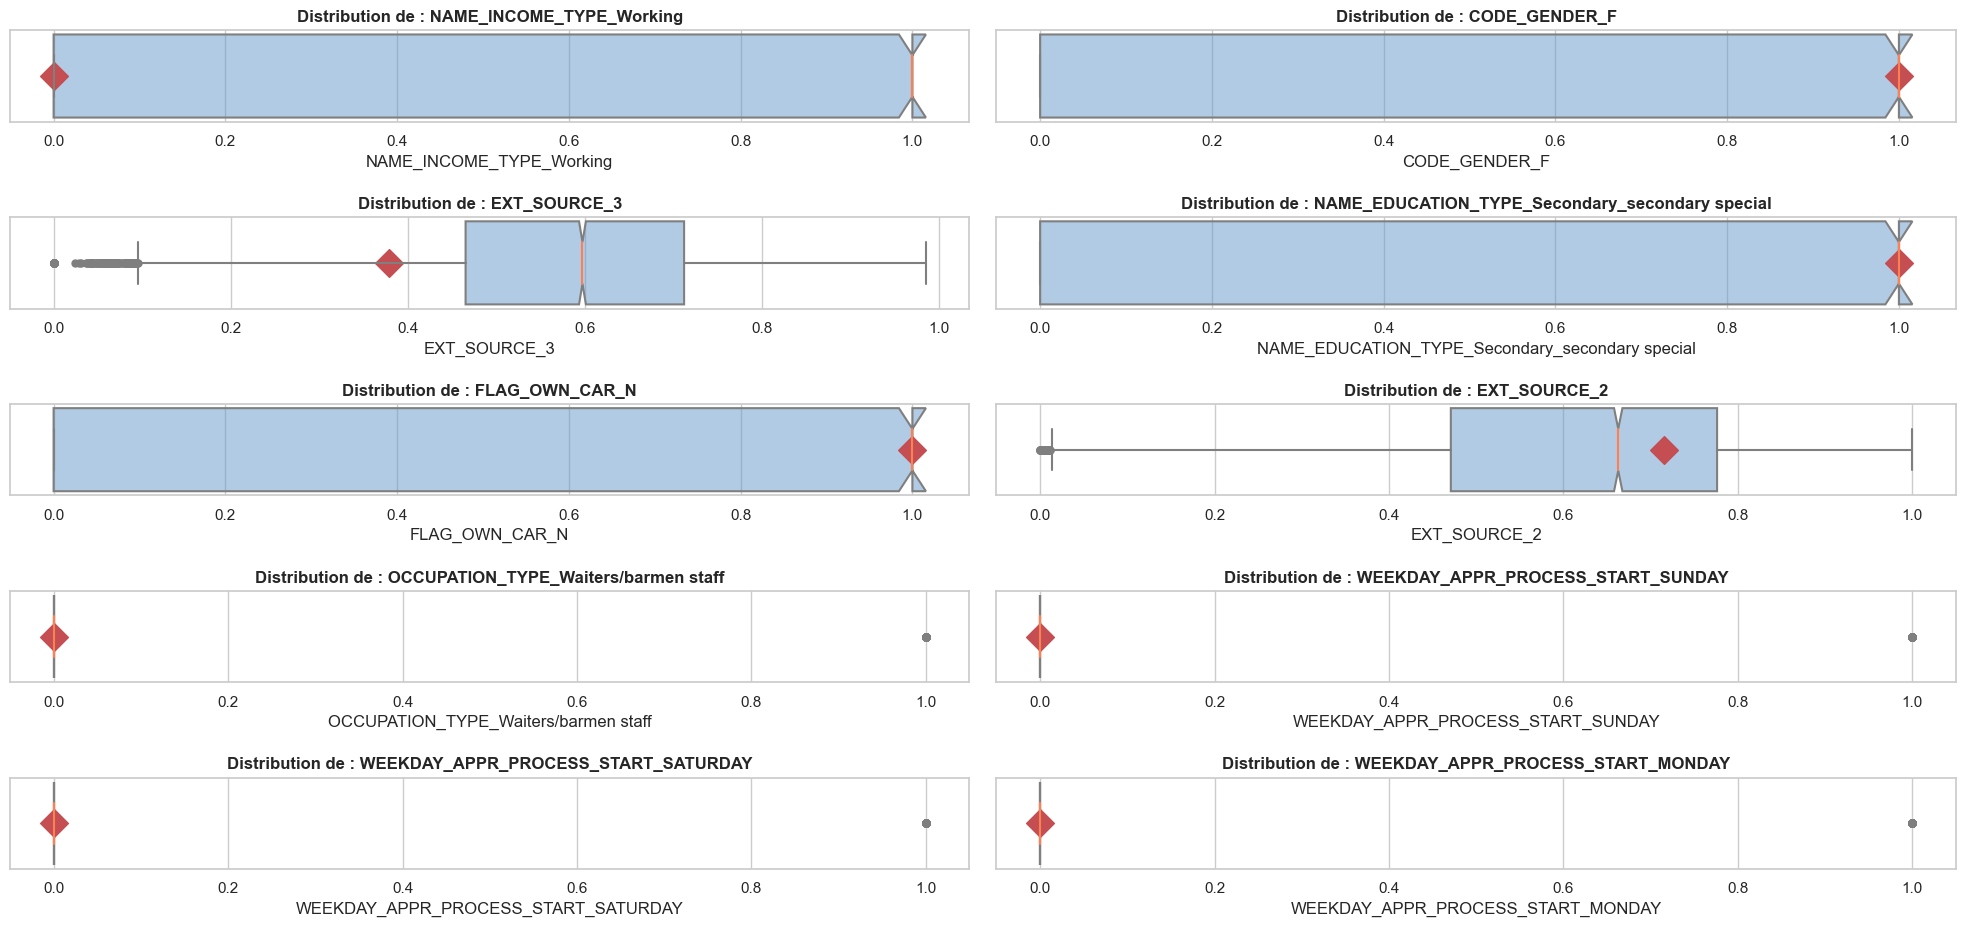

In [53]:
sel = top_10
# Sélection des variables à afficher dans les boîtes à moustaches

width = 20
# Largeur de la figure en pouces

height = ((len(sel)+1)/2)*2
# Hauteur de la figure en pouces, calculée en fonction du nombre de variables sélectionnées

fig = plt.figure(figsize=(width, height))
# Création d'une nouvelle figure avec la largeur et la hauteur spécifiées

for i, c in enumerate(sel,1):
    # Boucle pour chaque variable sélectionnée
    chaine = 'Distribution de : ' + c
    # Création de la chaîne de caractères pour le titre du graphique
    ax = fig.add_subplot((len(sel)+2)//2, 2, i)
    # Ajout d'un sous-graphique à la figure
    plt.title(chaine)
    # Définition du titre du graphique
    sns.boxplot(x=X_test[c],
                orient='h',
                color='lightgrey',
                notch=True,
                flierprops={"marker": "o"},
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
                ax=ax)
    # Génération du graphique de boîte à moustaches pour la variable en cours

    # Affichage des valeurs d'ID des clients pour chaque variable
    plt.scatter(ID_to_predict[c], c, marker = 'D', c='r', s=200)
    # Ajout des ID des clients sélectionnés sur le graphique

sns.set_context("talk")
# Définition du contexte de style de Seaborn
plt.tight_layout()
# Ajustement automatique des marges de la figure

In [54]:
top_20 = feature_importance.sort_values(by='feature_importance_vals', ascending=False)[0:20].col_name.tolist()
feat_tot = feature_importance.feature_importance_vals.sum()
feat_top = feature_importance.loc[feature_importance['col_name'].isin(top_20)].feature_importance_vals.sum()
print('les 20 premières features représentent', round((feat_top/feat_tot)*100, 2),'% de l\'importance de toutes les features.')

les 20 premières features représentent 100.0 % de l'importance de toutes les features.


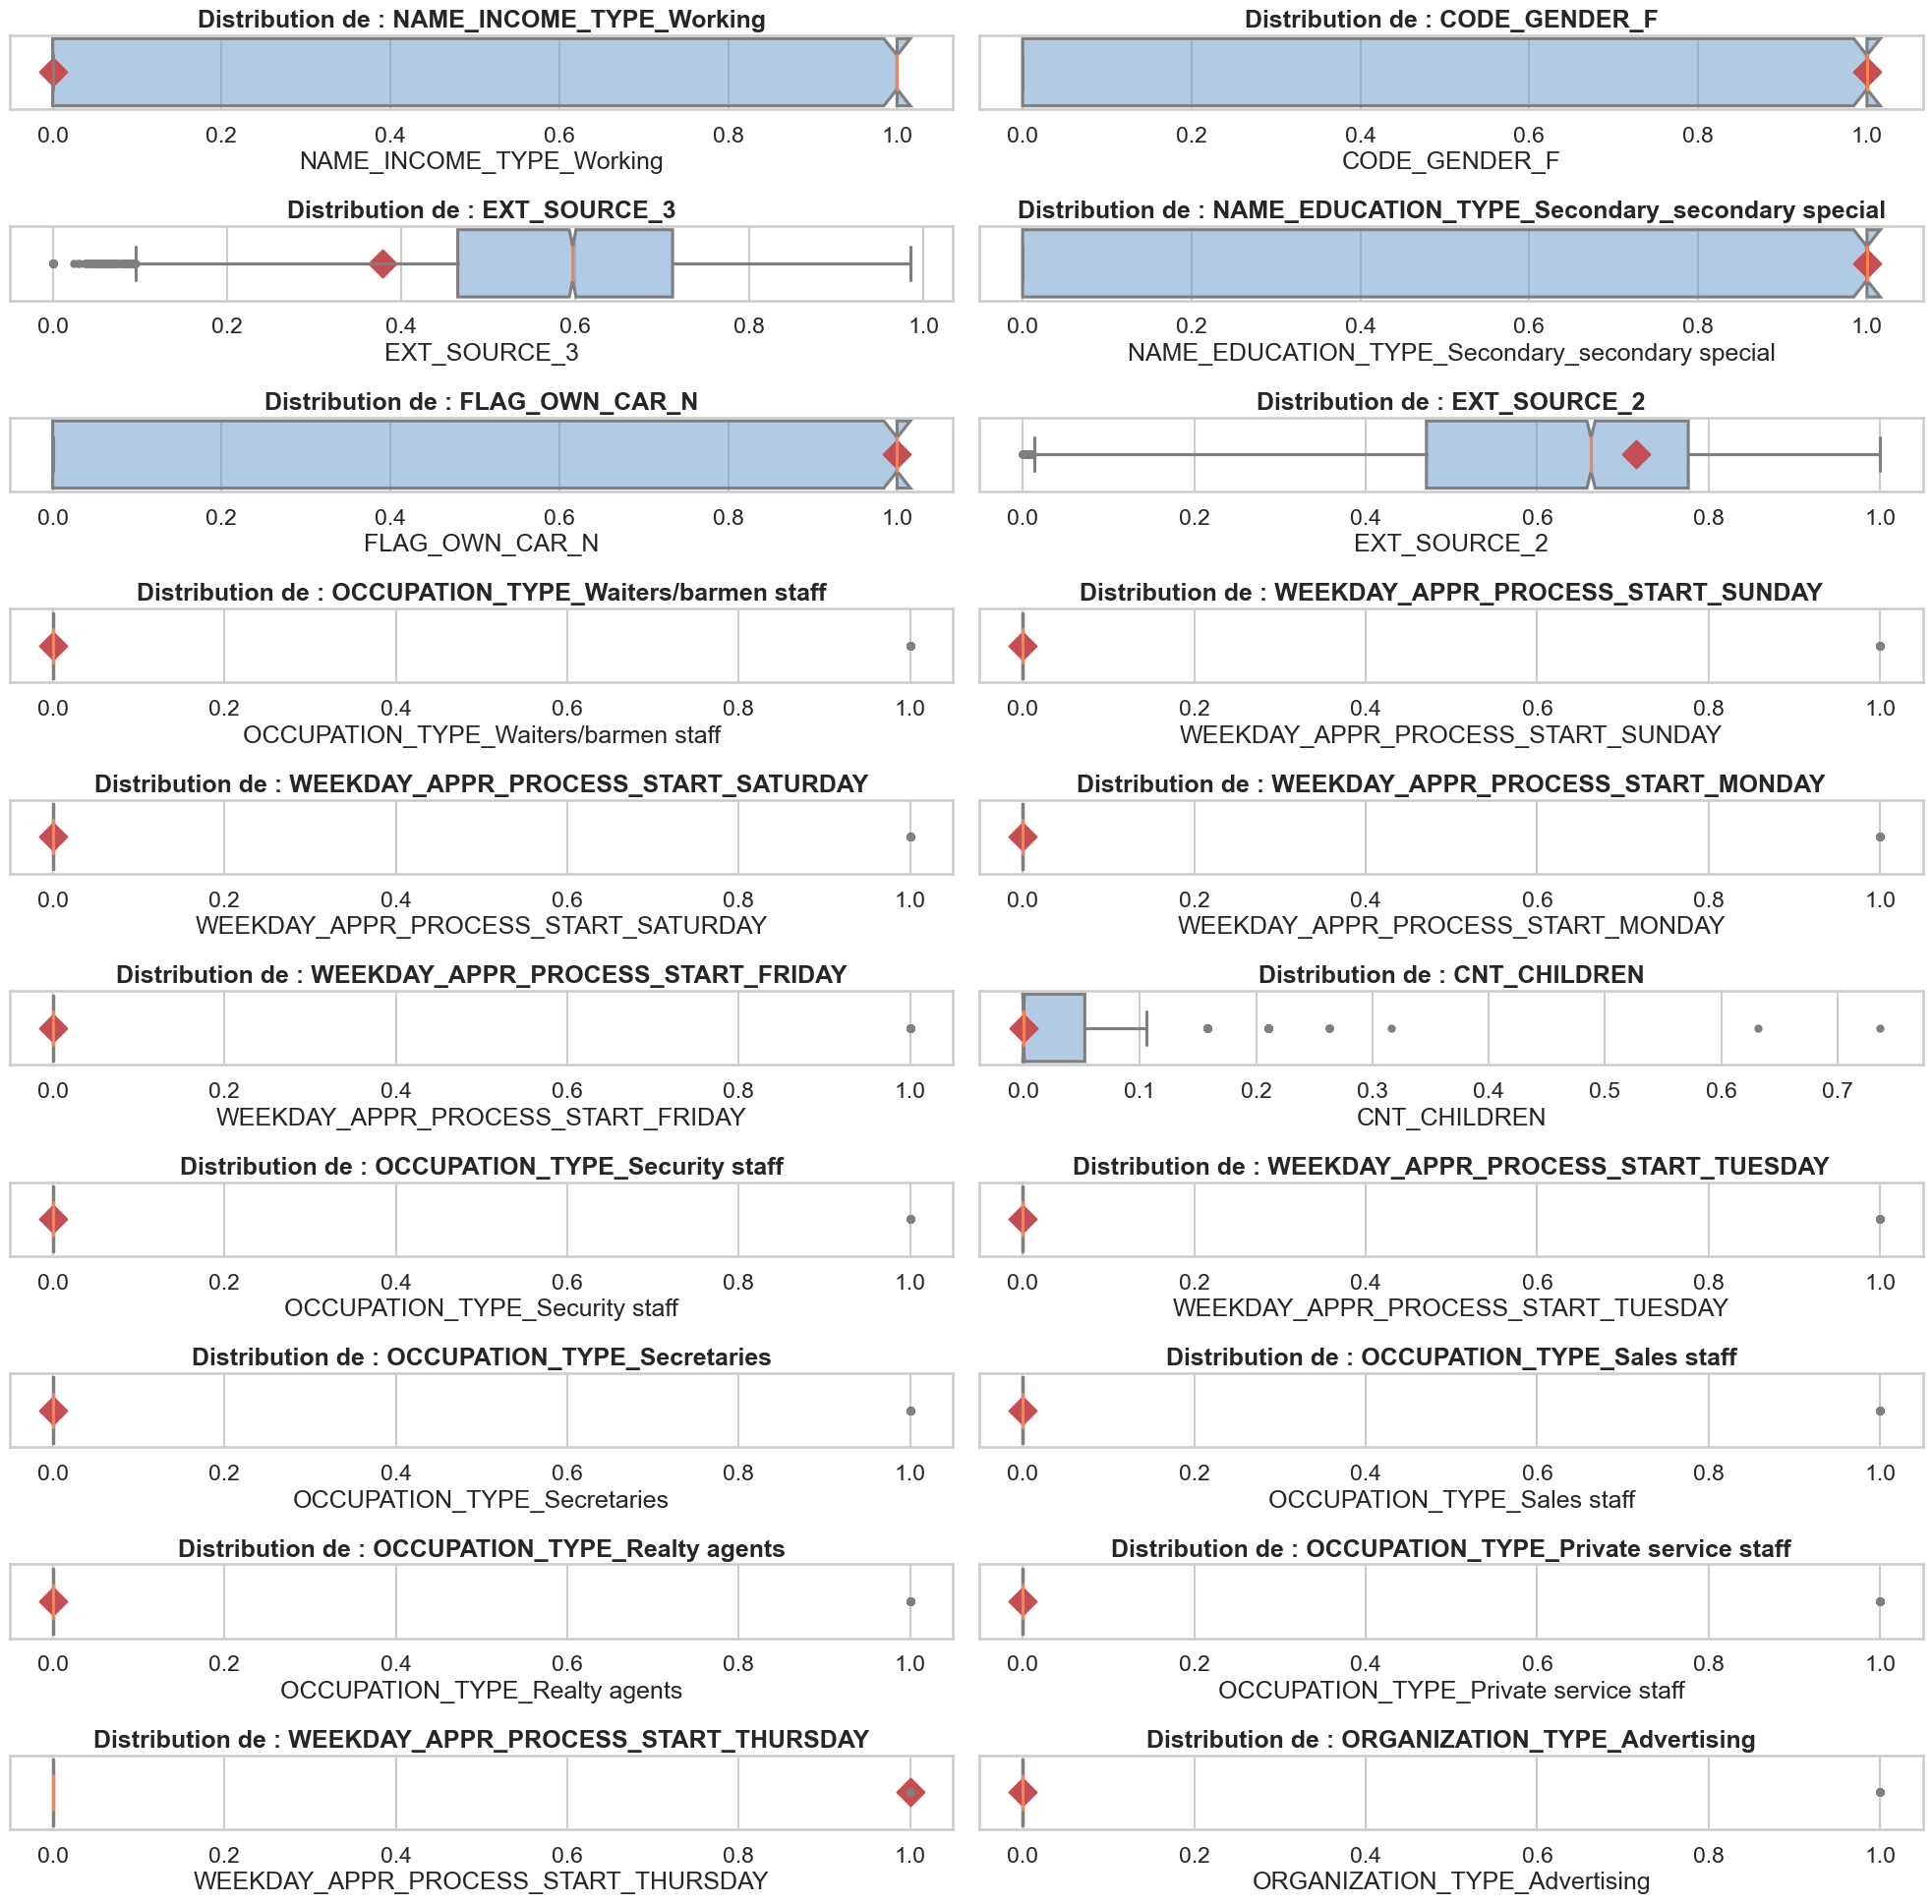

In [55]:
# Show boxplot for each feature with original units
# selection of 20 most explicative features
sel = top_20

width = 20
height = ((len(sel)+1)/2)*2

fig = plt.figure(figsize=(width, height))

for i, c in enumerate(sel,1):
    chaine = 'Distribution de : ' + c
    ax = fig.add_subplot((len(sel)+2)//2, 2, i)
    plt.title(chaine)
    sns.boxplot(x=X_test[c],
                orient='h',
                color='lightgrey',
                notch=True,
                flierprops={"marker": "o"},
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
                ax=ax)

# show customer ID values for each feature
    plt.scatter(ID_to_predict[c], c, marker = 'D', c='r', s=200)

# scaling automatique ('notebook', 'paper', 'talk', 'poster')
sns.set_context("talk")
fig.tight_layout()

In [56]:
print(f'the model predicted :',round(float(model['classifier'].predict_proba(ID_to_predict)[:,1]),4))

the model predicted : 0.8127


#### Waterfall visualization & explanation

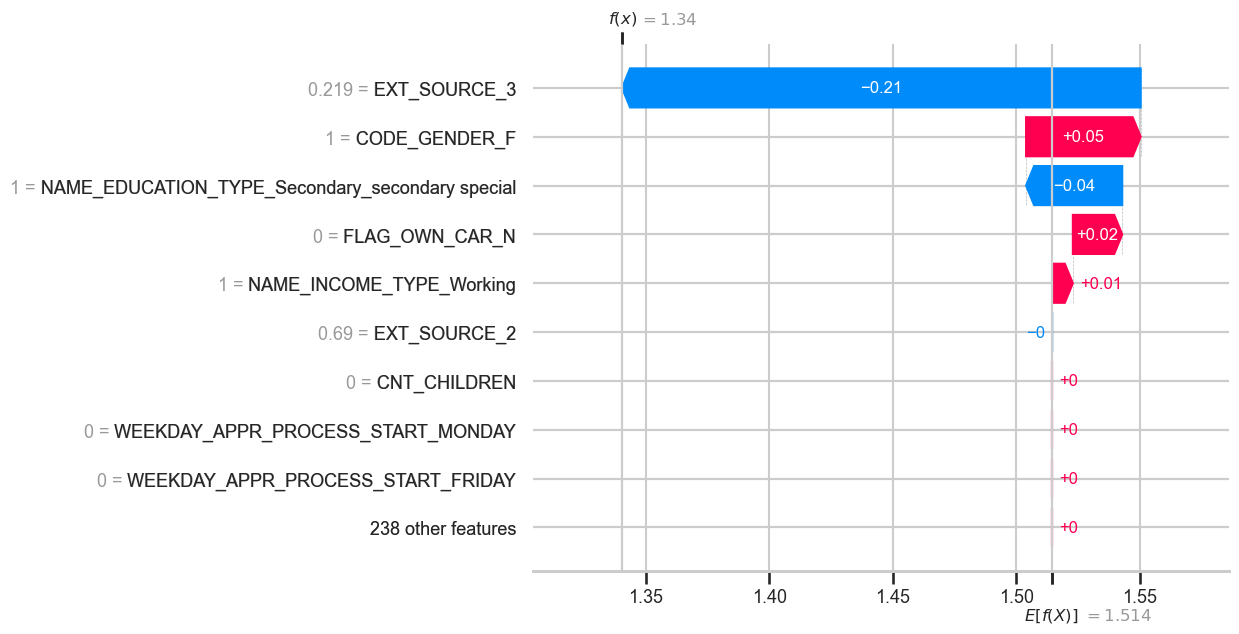

In [57]:
shap.waterfall_plot(shap_values[63], max_display=10, show=True)

In [58]:
# link = 'logit' to get the output in the same unit than the model target
# here we can see the probability of class 1
shap.force_plot(
    explainer.expected_value,
    shap_values1[data_idx, :],
    X_test.iloc[data_idx, :],
    link='logit' # choose between 'logit' or 'identity'
)

In [59]:
explainer.expected_value

1.5144982996582985

In [60]:
shap_values.base_values[data_idx]

1.5144982996582985

In [61]:
def sample_feature_importance(idx, type='feat_import'):
    if type=='odds_default':
        return shap.force_plot(shap_values.base_values[idx], shap_values1[idx, :],\
                               X_test.iloc[idx, :])
    
    elif type=='base_val_to_odds':
        return shap.waterfall_plot(shap_values[idx],
                                   max_display=10)
    
    elif type=='summary_global':
        return shap.summary_plot(shap_values, X_test,
                                 max_display=10, # nb of displayed features
                                )
    
    elif type=='feat_import':
        return shap.summary_plot(shap_values, X_test,
                                 plot_type="bar", feature_names=X_columns)

    elif type=='prob_default':
        return shap.force_plot(shap_values.base_values[idx],
                               shap_values1[idx, :],
                               X_test.iloc[idx, :],
                               link='logit') # choose between 'logit' or 'identity'

    else:
        return "Return valid visual ('feat_import', 'base_val_to_odds', 'summary_global',\
        'odds_default', 'prob_default')"

plt.show()

In [62]:
sample_feature_importance(data_idx, type='odds_default')

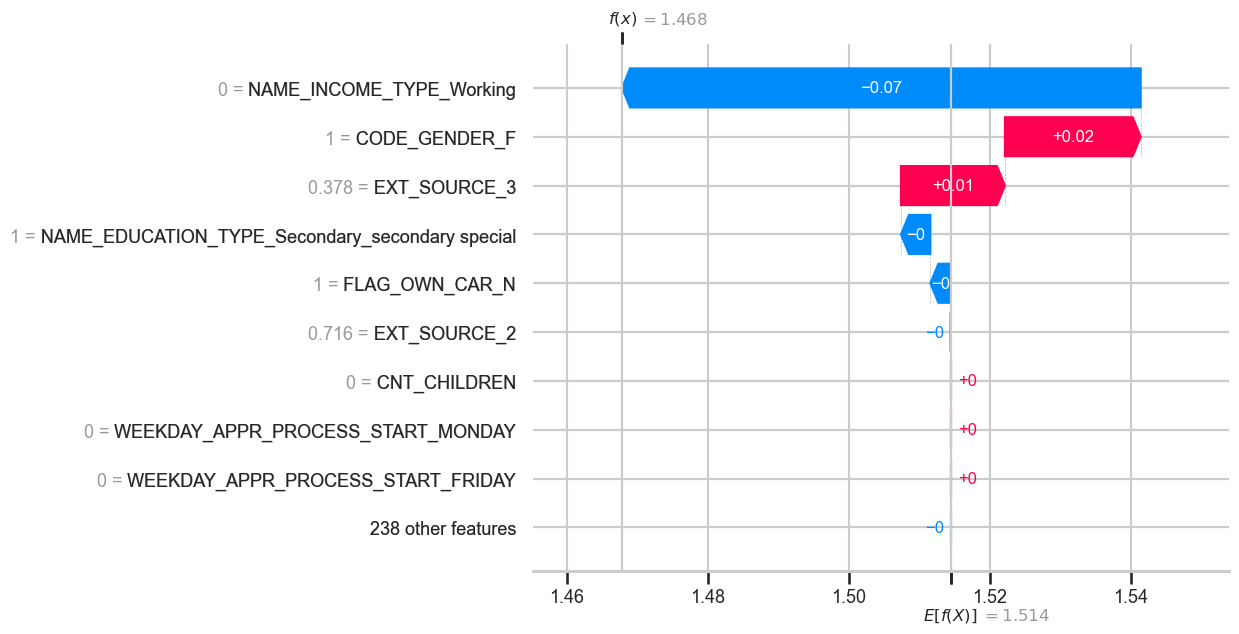

In [63]:
sample_feature_importance(data_idx, type='base_val_to_odds')

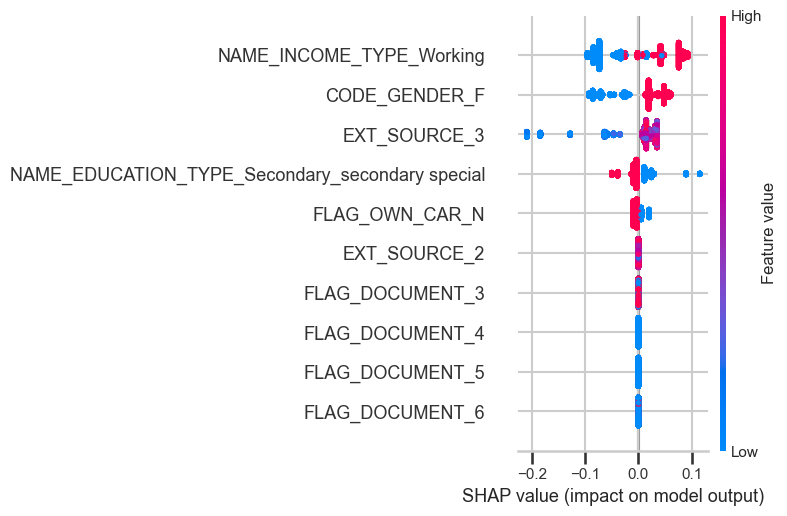

In [64]:
sample_feature_importance(data_idx, type='summary_global')

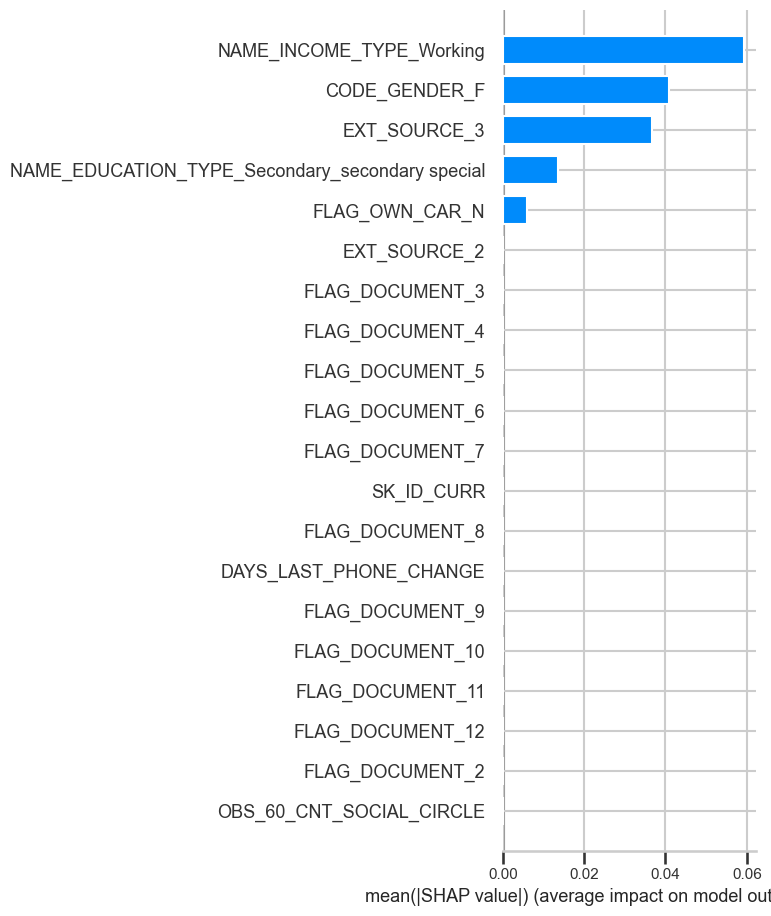

In [65]:
sample_feature_importance(data_idx, type='feat_import')

In [66]:
sample_feature_importance(data_idx, type='prob_default')

#### Autres visualisations

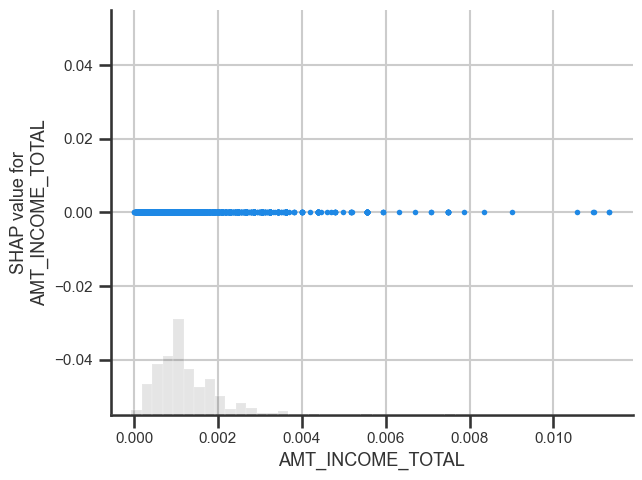

In [67]:
# visualize the model's dependence on the first feature again, now in the new original feature space
shap.plots.scatter(shap_values[:, 1])

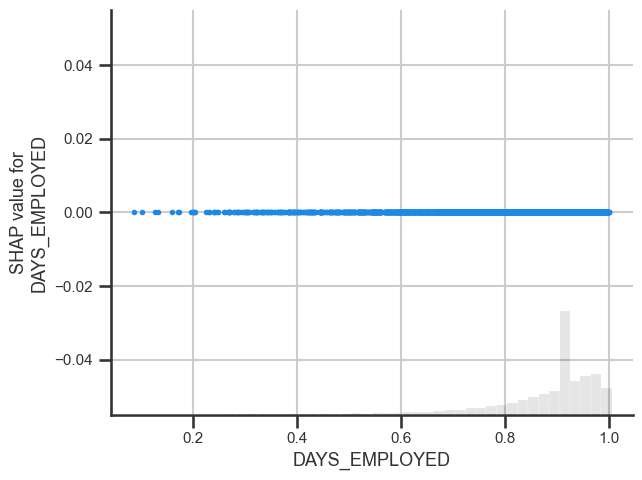

In [68]:
shap.plots.scatter(shap_values[:, "DAYS_EMPLOYED"])

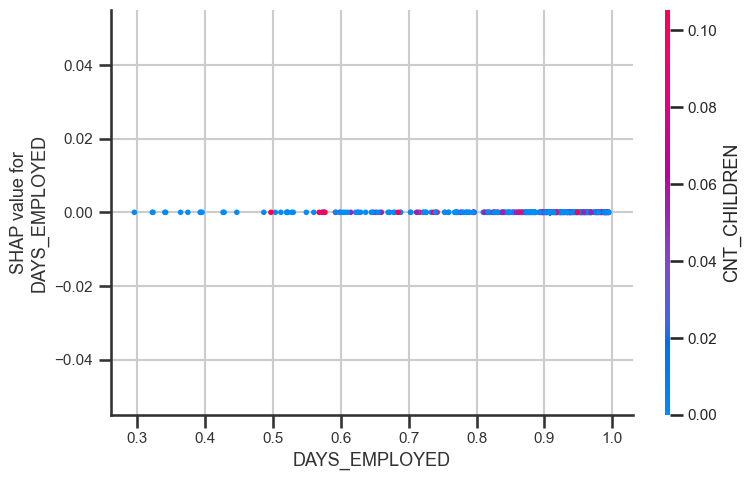

In [69]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("DAYS_EMPLOYED",
                     shap_values1[0:500,:],
                     X_test.iloc[0:500,:])

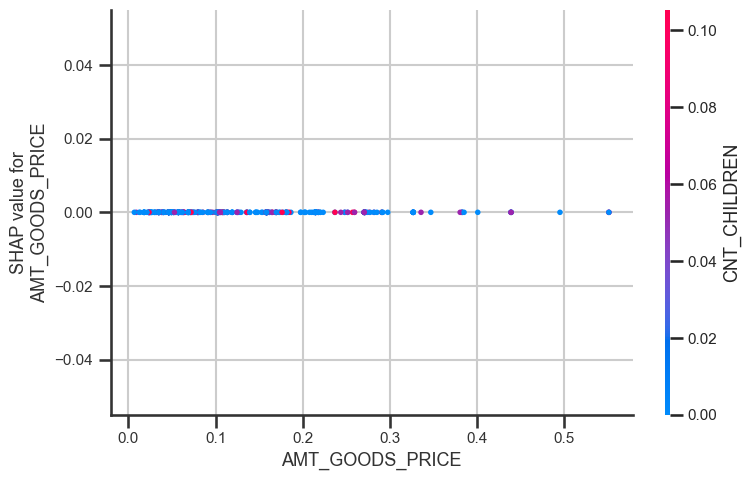

In [70]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("AMT_GOODS_PRICE",
                     shap_values1[0:500,:],
                     X_test.iloc[0:500,:])

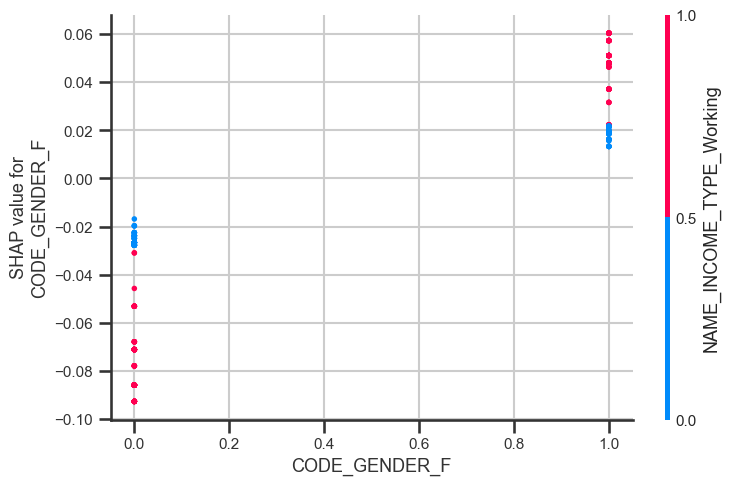

In [71]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("CODE_GENDER_F",
                     shap_values1[0:500,:],
                     X_test.iloc[0:500,:])

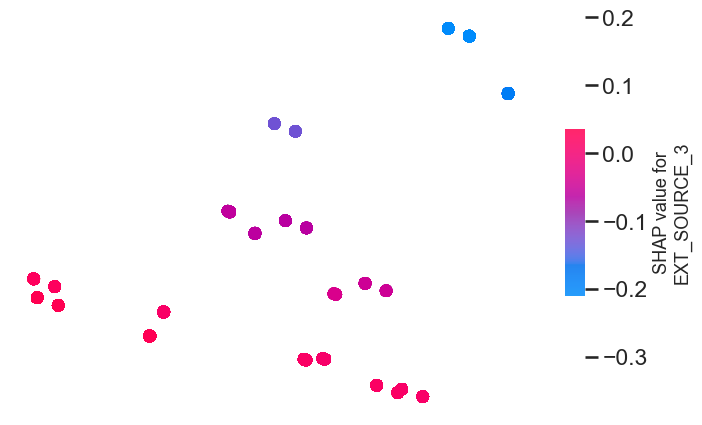

In [72]:
shap.embedding_plot("EXT_SOURCE_3", shap_values1, feature_names=X_columns,\
                    method='pca', alpha=0.85, show=True)

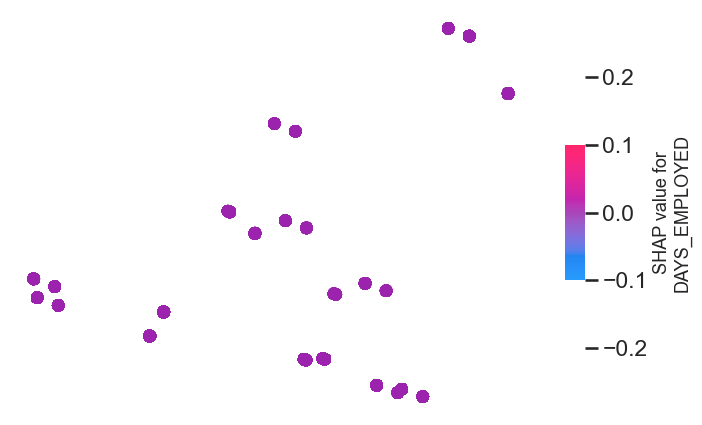

In [73]:
shap.embedding_plot("DAYS_EMPLOYED", shap_values1, feature_names=X_columns,\
                    method='pca', alpha=0.85, show=True)


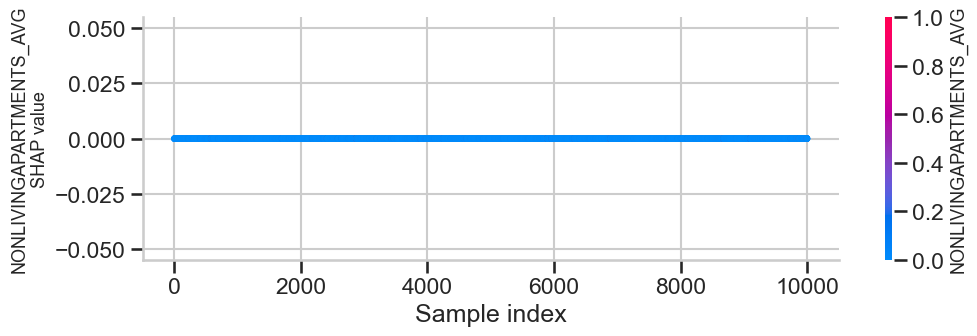

In [74]:
shap.monitoring_plot(42, shap_values1, X_test, feature_names=X_columns, show=True)

In [75]:
# Sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values1), 0))

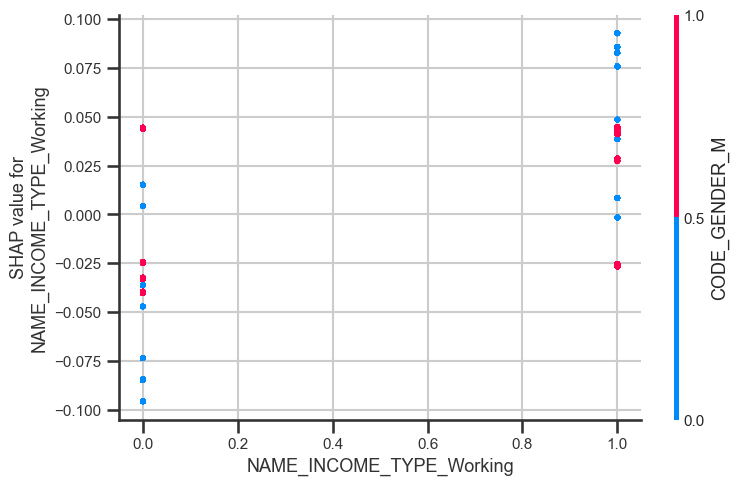

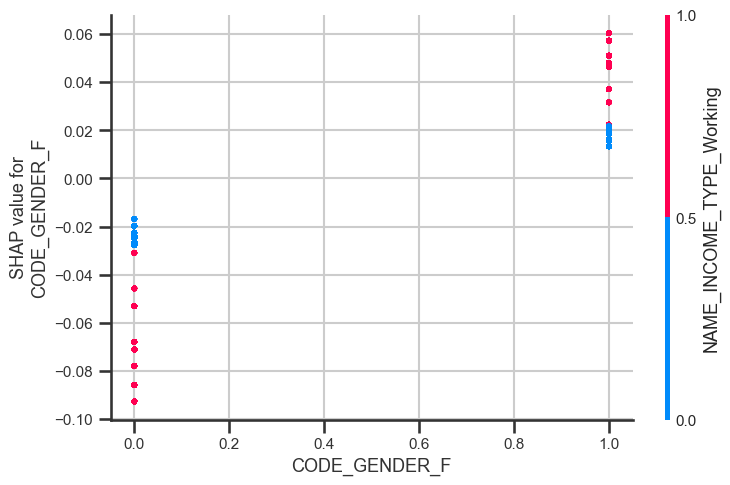

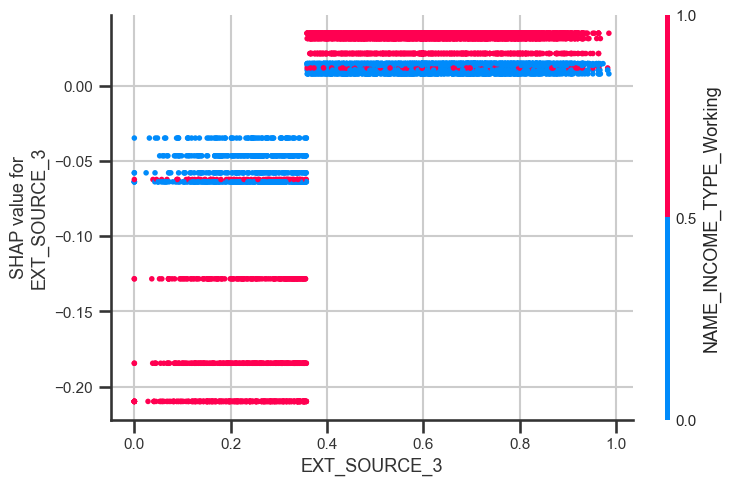

In [76]:
# make SHAP plots of the three most important features
for i in range(3):
    shap.dependence_plot(top_inds[i],
                         shap_values1,
                         features = X_test,
                         feature_names=X_columns,
                         display_features = X_test,)

#### Sauvegarde; valeurs SHAPE, valeur attendue

In [77]:
# Backup Model final
joblib.dump(model, 'Models/model.joblib')

# Backup X_test
joblib.dump(X_test, 'Models/X_test.pkl')

# Backup y_test
joblib.dump(y_test, 'Models/y_test.pkl')

# Backup y_pred
joblib.dump(y_pred, 'Models/y_pred.pkl')

# backup SHAP explainer
explainer.save(open('Models/explainer', 'wb') , model_saver="auto", masker_saver="auto")

# Backup SHAP values
joblib.dump(shap_values, 'Models/shap_values.pkl')

# Backup SHAP values1
joblib.dump(shap_values1, 'Models/shap_values1.pkl')

# Backup Expected values
joblib.dump(explainer.expected_value, 'Models/expected_values.pkl')

['Models/expected_values.pkl']

In [78]:
# on recharge les données de test
X_test = joblib.load('Models/X_test.pkl')

In [79]:
X_test

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,...,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,

In [3]:
import joblib
print("Joblib version:", joblib.__version__)

Joblib version: 1.1.1


In [4]:
# Backup X_train
X_chat=joblib.load('Models/X_train.pkl')

In [6]:
X_chat=X_chat[0:20000]

In [8]:
joblib.dump(X_chat, 'Models/X_echat.pkl')

['Models/X_echat.pkl']